# Shape correspondence

You can use the shape correspondence tool to measure how different a mesh's local shape is from any other vertex in the mesh. This is useful for finding the most similar vertex to a given vertex in a mesh.

In [12]:
import vedo
import napari
import napari_shape_odyssey as nso
from napari_shape_odyssey._signatures.landmarks import CorrespondenceWidget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
viewer = napari.Viewer(ndisplay=3)

Invalid schema for package 'napari-stl-exporter', please run 'npe2 validate napari-stl-exporter' to check for manifest errors.


In [21]:
cow = vedo.load(vedo.dataurl + 'cow.vtk').triangulate().clean().subdivide()
layer = viewer.add_surface((cow.points(), np.asarray(cow.faces())), colormap='inferno_r')
layer.wireframe.visible = True

## Calculate heat kernel signature

In [22]:
heat_signature = nso.signatures.heat_kernel_signature((cow.points(), np.asarray(cow.faces())), np.linspace(0, 1, 10))
heat_signature = pd.DataFrame(heat_signature, columns=[f'heat_{i}' for i in range(heat_signature.shape[1])])
viewer.layers[0].features = heat_signature

We now add the Correspondence Widget to napari. If you activate the correspondence mode (`Activate Correspondence`) you can click on points on the mesh and see how different the rest of the mesh is from that point.

In [ ]:
widget = CorrespondenceWidget(napari_viewer=viewer)
viewer.window.add_dock_widget(widget, area="right")

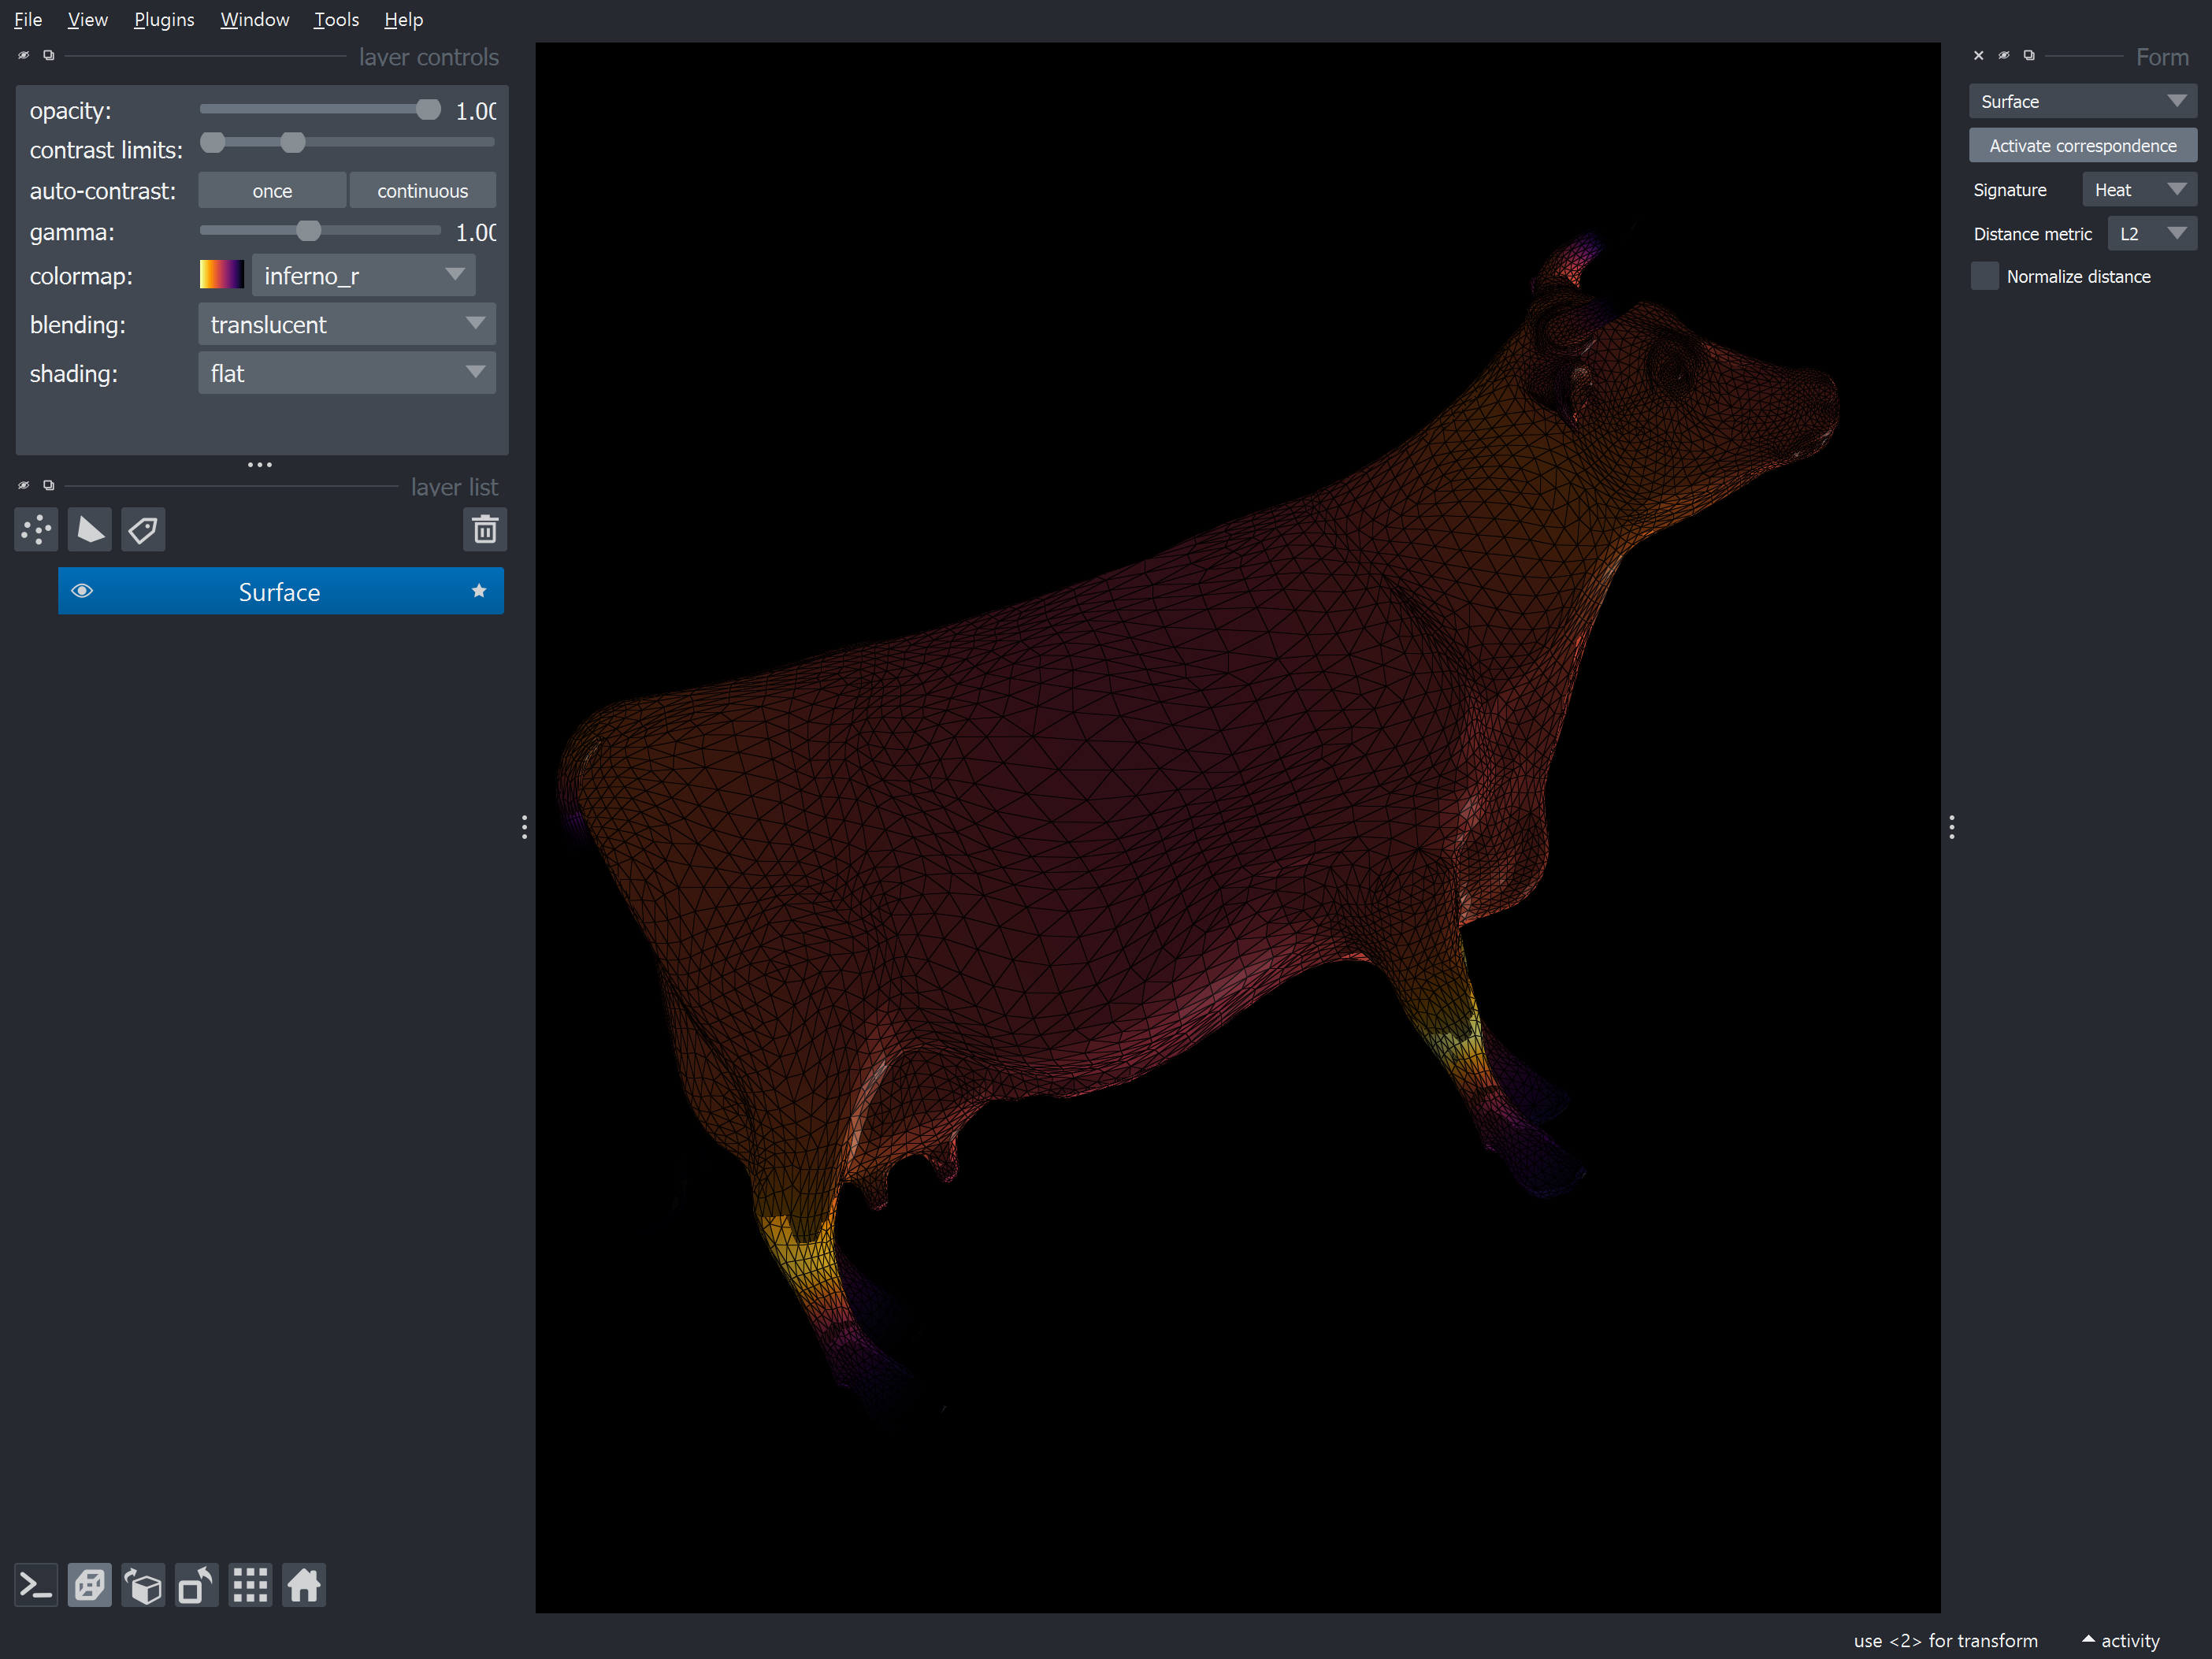

In [24]:
napari.utils.nbscreenshot(viewer)